In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [2]:
# read NHANES data: Vitamin A, Vitamin E & Carotenoids 2005-2006
derm_2003 = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/derm_2003.XPT')
# Dermatology_questionaire
dermatology_questionaire = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/dermatology_questionaire.XPT')
# Alcohol
alcohol = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/alcohol.XPT')
# demo_2003
demo_2003 = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/demo_2003.XPT')
# body_measure
body_measure = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/body_measure.XPT')
# Vitimin_ace
vitamin_ace = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/vitamin_ace.XPT')
# use_of_supplements
use_of_supplements = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/use_of_supplements.XPT')
# smoking
smoking = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/smoking.XPT')
# vitimin_d
vitimin_d = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/vitimin_d.XPT')
# CRP
CRP = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/CRP.XPT')
# Supplement_count
supplement_count  = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/supplement_count.XPT')
# physical_activity
physical_activity = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/physical_activity.XPT')
# SMQMEC_C  smoke
SMQMEC_C = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/SMQMEC_C.XPT')
# immunization
immunization = pd.read_sas('/content/drive/MyDrive/Capstone/derm_data/immunization.XPT')

FileNotFoundError: ignored

In [ ]:
derm_joined = pd.merge(dermatology_questionaire,derm_2003, on = 'SEQN', how = 'left')
df = pd.merge(derm_joined, demo_2003, on = 'SEQN', how = 'left')
df = pd.merge(df, alcohol, on = 'SEQN', how = 'left')
df = pd.merge(df, body_measure, on = 'SEQN', how = 'left')
df = pd.merge(df, vitamin_ace, on = 'SEQN', how = 'left')
df = pd.merge(df, smoking, on = 'SEQN', how = 'left')
df = pd.merge(df, vitimin_d, on = 'SEQN', how = 'left')
df = pd.merge(df, CRP, on = 'SEQN', how = 'left')
df = pd.merge(df, supplement_count, on = 'SEQN', how = 'left')
#df = pd.merge(df, physical_activity, on = 'SEQN', how = 'left') # inconsistent entries
df = pd.merge(df, SMQMEC_C, on = 'SEQN', how = 'left')
df = pd.merge(df, immunization, on = 'SEQN', how = 'left')
#df = pd.merge(df, use_of_supplements, on = 'SEQN', how = 'left') # different supplements uninformative

In [ ]:
# number of psoriasis self-reported or detected by one of the readers, response variable
df['Psoriasis'] = 0
df.loc[(df['DEQ053'] == 1) |
                (df['DED2PSDX'] == 1) |
                (df['DED6PSDX'] == 1) |
                (df['DED1PSDX'] == 1), 'Psoriasis'] = 1

In [ ]:
df_subset = df[['Psoriasis','DED011','DEQ034D','DEQ038G','DED038Q','DEQ053','DEQ055','DEQ057','ALQ101','ALQ120Q','ALQ130','ALQ140Q','ALQ140U','ALQ150','BMXBMI','BMXWAIST','BMXHT','BMXTHICR','RIAGENDR','RIDAGEEX','RIDRETH1','RIDAGEMN','DMDMARTL','INDFMINC','INDHHINC','INDFMPIR','LBDVIDMS','SMQ620','SMQ710','SMQ020','SMQ720','IMD010','IMQ020','IMQ030','DSD010','DSDCOUNT','LBXCRP']]

In [ ]:
#'DSDSUPID','DSDSUPP','DSD103','DSD122Q'
# print(df_subset.dtypes)
# print(df_subset.isna().sum())
#DEQ057, DEQ055, ALQ140U, SMQ710, DED038Q
df_subset_removena = df_subset.drop(columns = ['DED038Q','DEQ055','DEQ057','ALQ140U','SMQ620','SMQ710','SMQ720'])

## Visualization

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# number of psoriasis self-reported or detected by one of the readers
derm_joined['Psoriasis'] = 0
derm_joined.loc[(derm_joined['DEQ053'] == 1) |
                (derm_joined['DED2PSDX'] == 1) |
                (derm_joined['DED6PSDX'] == 1) |
                (derm_joined['DED1PSDX'] == 1), 'Psoriasis'] = 1
derm_joined.describe()

,SEQN,MXAEXSTS,DEABACK,DEAINARM,DEAFRLEG,DEALOLEG,DEABKRSN,DEAIARSN,DEAFLRSN,DEALLRSN,...,DEQ083B,DED083C,DED083D,DEQ083E,DEQ083F,DEQ083G,DEQ083H,DEQ083I,DED083U,Psoriasis
count,2992.000000,2992.000000,2699.000000,2699.000000,2699.000000,2699.000000,6.000000,5.000000,7.000000,7.000000,...,128.0,145.0,81.0,103.0,40.0,24.0,27.0,36.0,2.0,2992.000000
mean,26115.232286,1.200869,1.002223,1.001853,1.002594,1.002594,3.333333,3.600000,3.285714,2.857143,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,30.0,0.046791
std,2910.198604,0.598750,0.047105,0.043009,0.050870,0.050870,1.632993,0.894427,1.889822,1.069045,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211227
min,21009.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,30.0,0.000000
25%,23656.500000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2.000000,2.000000,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,30.0,0.000000
50%,26092.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,2.000000,2.000000,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,30.0,0.000000
75%,28651.250000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,30.0,0.000000
max,31125.000000,3.000000,2.000000,2.000000,2.000000,2.000000,6.000000,4.000000,7.000000,4.000000,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,30.0,1.000000


In [ ]:
derm_demo = pd.merge(derm_joined, demo_2003, on = 'SEQN')
# derm_demo.Psoriasis

In [ ]:
# build the data frame of gender and race
disease = derm_demo[(derm_demo.DED1PSDX==1)|(derm_demo.DED2PSDX==1)|(derm_demo.DED6PSDX==1)]
gender_dict = {1:'Male',2:'Female'}
race_dict = {1:'Mexican American',2:'Other Hispanic',3:'Non-Hispanic White',4:'Non-Hispanic Black',5:'Other Race - Including Multi-Racial'}

disease_summary = pd.DataFrame([[gender_dict[1],race_dict[1],0],[gender_dict[1],race_dict[2],0],
              [gender_dict[1],race_dict[3],0],[gender_dict[1],race_dict[4],0],
              [gender_dict[1],race_dict[5],0],[gender_dict[2],race_dict[1],0],
              [gender_dict[2],race_dict[2],0],[gender_dict[2],race_dict[3],0],
              [gender_dict[2],race_dict[4],0],[gender_dict[2],race_dict[5],0]],columns=['Gender','Race','Count'])


# combine this two variables and count them
grouped_dis = disease.groupby(['RIAGENDR','RIDRETH1']).apply(lambda x: len(x))
for ind in grouped_dis.index:
  disease_summary.loc[(disease_summary.Gender==gender_dict[ind[0]])&(disease_summary.Race==race_dict[ind[1]]),'Count'] = grouped_dis[ind[0]][ind[1]]

In [ ]:
import plotly.express as px

# plot the relationship between race and gender that had this disease
fig = px.bar(disease_summary, x='Gender', y='Count',color='Race',labels={'Count':'Total Patient Amount'}, title='Patient Distribution (Race)',height=700)
fig.show()

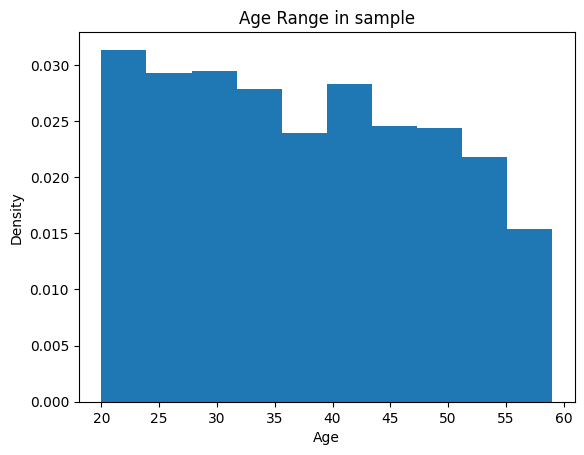

In [ ]:
# check the range of age
import matplotlib.pyplot as plt
plt.hist(derm_demo.RIDAGEYR,density=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Range in sample')
plt.show()

In [ ]:
# build the data frame for gender and age
gender_dict = {1:'Male',2:'Female'}
age_dict = {'Young Adult':[20,30],'Mid Adult':[30,45],'Elder Adult':[45,59]}

disease_summary2 = pd.DataFrame([
              [gender_dict[1],'Young Adult',0],[gender_dict[1],'Mid Adult',0],
              [gender_dict[1],'Elder Adult',0],[gender_dict[2],'Young Adult',0],
              [gender_dict[2],'Mid Adult',0],[gender_dict[2],'Elder Adult',0]
               ],columns=['Gender','Age','Count'])

# combine this two variables and count them
for g in gender_dict:
  for a in age_dict:
    start = age_dict[a][0]
    end = age_dict[a][1]
    count = len(disease[(disease.RIDAGEYR>start)&(disease.RIDAGEYR<=end)&(disease.RIAGENDR==g)])
    disease_summary2.loc[(disease_summary2.Gender==gender_dict[g])&(disease_summary2.Age==a),'Count'] = count

In [ ]:
# plot the relationship between gender and age
fig = px.bar(disease_summary2, x='Gender', y='Count',color='Age',labels={'Count':'Total Patient Amount'}, title='Patient Distribution (Age)',height=700)
fig.show()

In [ ]:
### to do
## 1. impute empty columns using mean/mode depends on data type
## 2. correlation check, drop features with very high correlation

## If feature type is float but classification: Use mean value to replace the missing data

In [ ]:
# impute the empty columns using the mean value
df_subset_removena['RIDAGEEX'].fillna(df_subset_removena['RIDAGEEX'].mean(), inplace=True)

df_subset_removena['BMXBMI'].fillna(df_subset_removena['BMXBMI'].mean(), inplace=True)
df_subset_removena['BMXWAIST'].fillna(df_subset_removena['BMXWAIST'].mean(), inplace=True)
df_subset_removena['BMXHT'].fillna(df_subset_removena['BMXHT'].mean(), inplace=True)
df_subset_removena['BMXTHICR'].fillna(df_subset_removena['BMXTHICR'].mean(), inplace=True)

df_subset_removena['LBDVIDMS'].fillna(df_subset_removena['LBDVIDMS'].mean(), inplace=True)
df_subset_removena['LBXCRP'].fillna(df_subset_removena['LBXCRP'].mean(), inplace=True)

## If feature type is classification: Use boostrap resampling to fill the missing data (should make more sense than mode)

In [ ]:
# impute the empty columns using the probability of each option
def boostrap(s):
  grouped = df_subset_removena.groupby(s).apply(lambda x: len(x))
  cdf = np.cumsum(grouped/grouped.sum())
  def simulation(x):
    rdm = np.random.rand()
    for i in cdf.index:
      if rdm <= cdf[i]:
        return i

  df_subset_removena[s].loc[df_subset_removena[s].isna()] = df_subset_removena[s][df_subset_removena[s].isna()].apply(simulation)
  return

In [ ]:
boostrap('DED011')
boostrap('DEQ034D')
boostrap('DEQ038G')
boostrap('DEQ053')
boostrap('ALQ101')
boostrap('ALQ120Q')
boostrap('ALQ130')
boostrap('ALQ140Q')
boostrap('ALQ150')
boostrap('DMDMARTL')
boostrap('INDFMINC')
boostrap('INDHHINC')
boostrap('INDFMPIR')
boostrap('SMQ020')
boostrap('IMQ030')
boostrap('DSD010')
boostrap('DSDCOUNT')

## After filling out missing values, do feature correlation plot

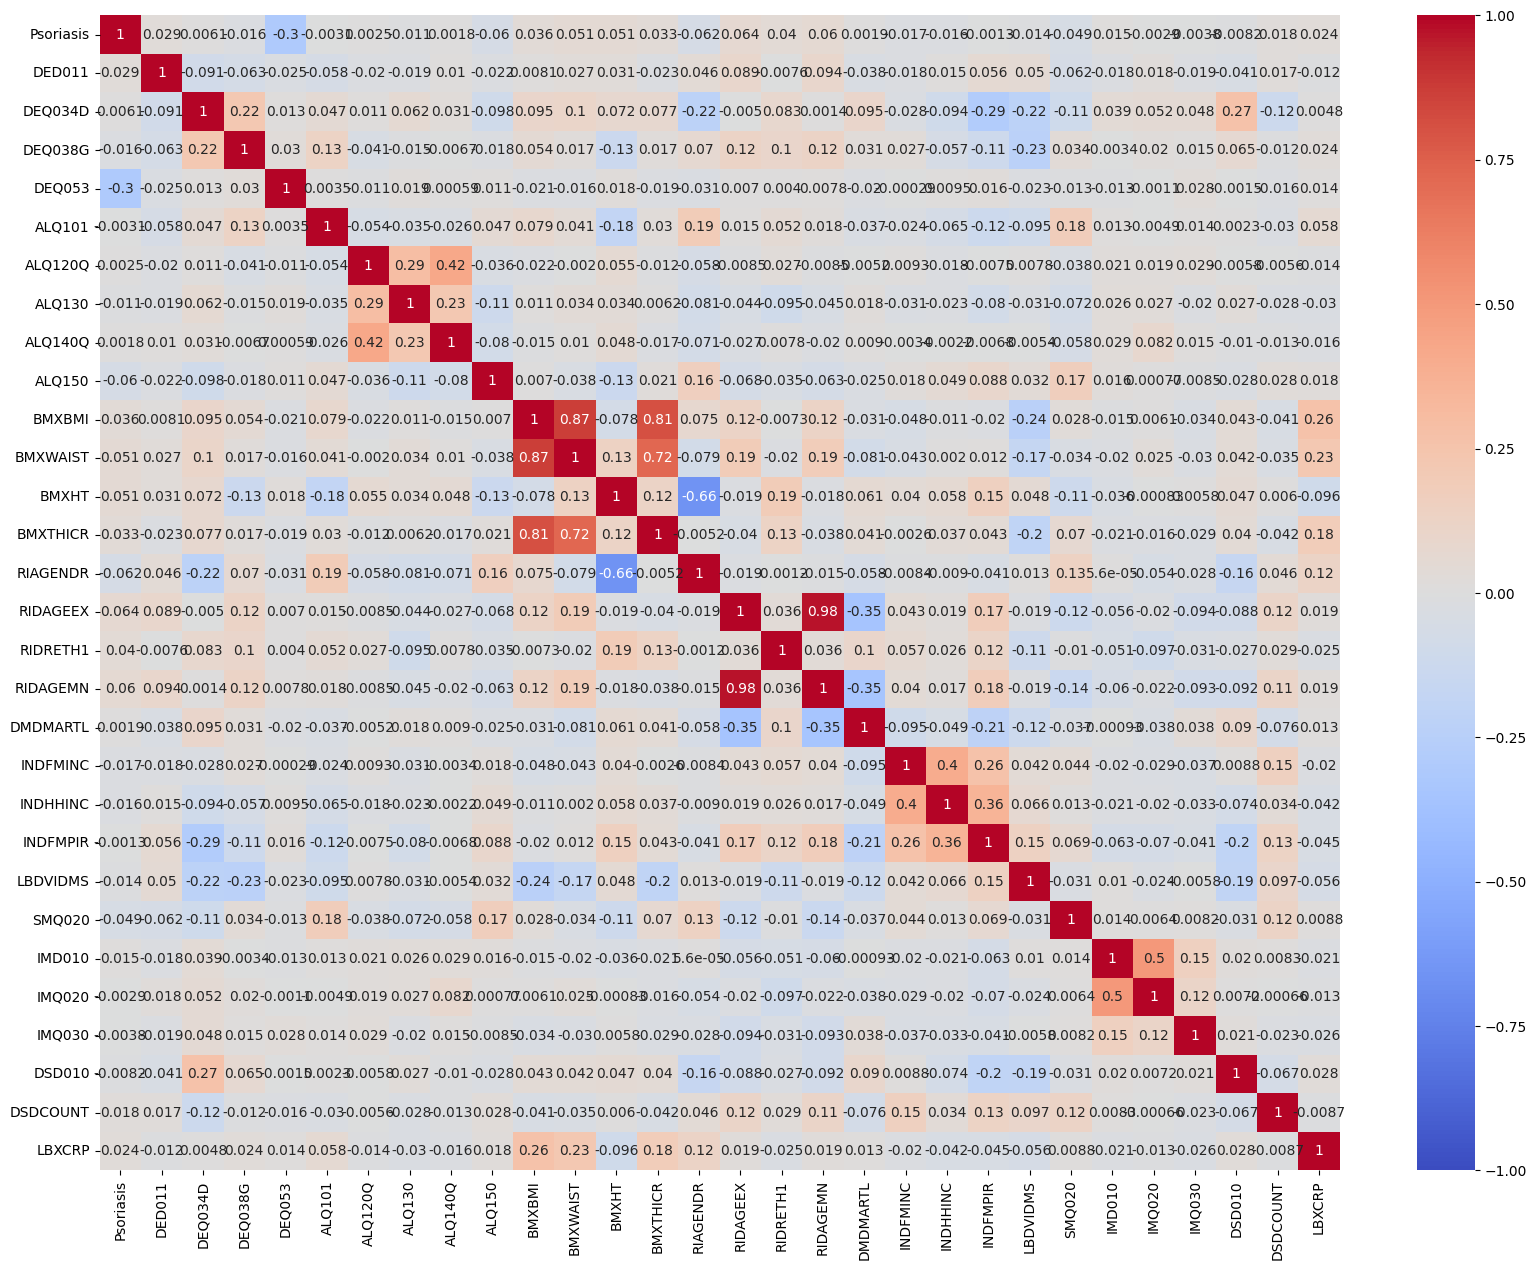

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# show the correlation before drop any columns
correlation_matrix1 = df_subset_removena.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [ ]:
# drop waist and thigh, and also the age in months
df_subset_removena = df_subset_removena.drop('BMXWAIST', axis=1)
df_subset_removena = df_subset_removena.drop('BMXTHICR', axis=1)
df_subset_removena = df_subset_removena.drop('RIDAGEMN', axis=1)


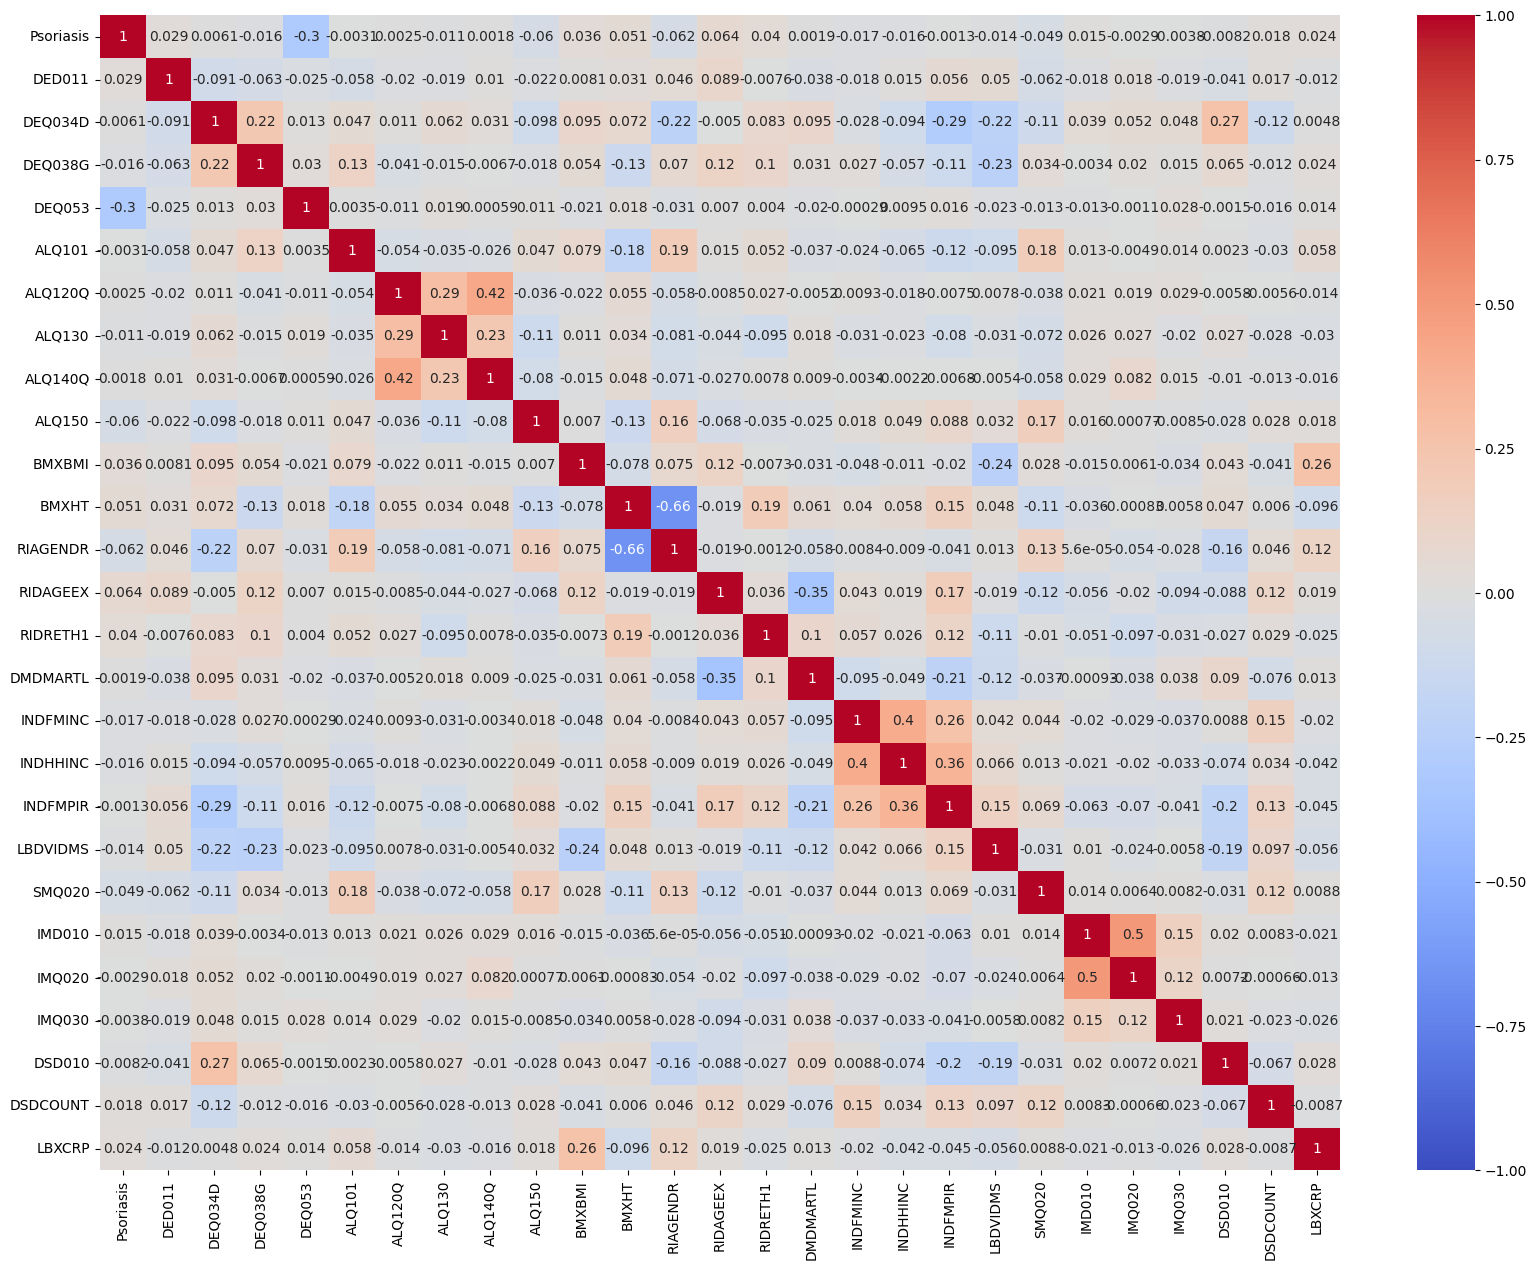

In [ ]:
# check the correlation again
correlation_matrix = df_subset_removena.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()